In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'../')
from pprint import pprint
import json
Settings = json.load(open('settings.txt'))
pprint(Settings)
import matplotlib.pyplot as plt


root = Settings['data_root']

from cabbage.data import ReId

sampler = ReId.DataSampler(root, 112, 112)

{'data_root': '/home/data',
 'deepmatch': '/home/deepmatching_1.2.2_c++/deepmatching-static'}
/home/data/cuhk03_release found :)
/home/data/Market-1501-v15.09.15 found :)
/home/data/DukeMTMC-reID found :)
found memmaped /home/data/cuhk03_release/labeled112x112.npy
(cuhk) positive test pairs: 9290
(cuhk) positive train pairs: 127242
(market) positive test pairs:  300631
(market) positive train pairs:  309874
load memmap /home/data/DukeMTMC-reID/bounding_box_test112x112.npy
load memmap /home/data/DukeMTMC-reID/bounding_box_train112x112.npy
(duke) positive test pairs:  926089
(duke) positive train pairs:  749270


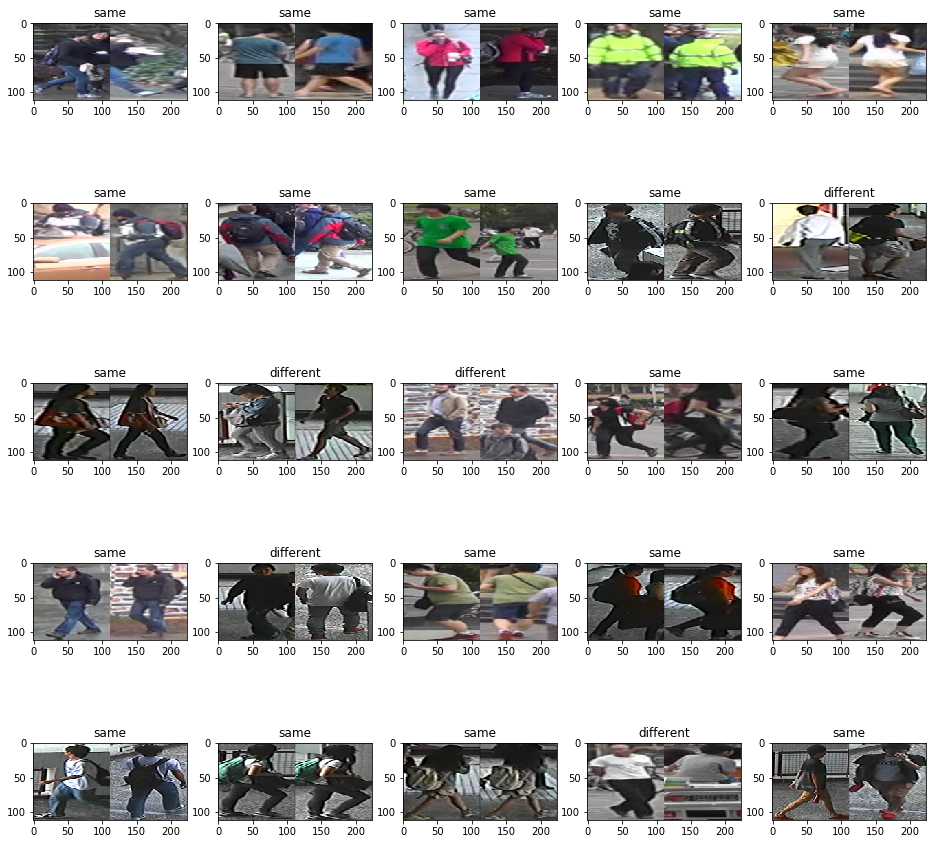

In [5]:
import numpy as np

X, Y = sampler.get_train_batch(20, 5)
x = X[0]

fig = plt.figure(figsize=(16,16))

for i,(x,y) in enumerate(zip(X,Y)):
    ax = fig.add_subplot(5,5,i+1)
    txt = 'same' if y[0] == 1 else 'different'
    ax.set_title(txt)
    a = x[:,:,0:3]
    b = x[:,:,3:6]
    x = np.concatenate([a, b], axis=1)
    ax.imshow(x)

plt.show()